# Loan Classifier

In this project, we will complete a notebook where we will build a classifier to predict whether a loan case will be paid off or not.

We load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. We use the following algorithms to build our models:

- k-Nearest Neighbour
- Decision Tree
- Support Vector Machine
- Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

- Jaccard index
- F1-score
- LogLoass

Lets first load required libraries:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### Load data from CSV file

In [6]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Convert to date time object

In [7]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [10]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [11]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

## Data Visualization

Let’s see how many of each class is in our data set

In [12]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

__260__ people have paid off the loan on time while __86__ have gone into collection

Lets plot some columns to underestand data better:

In [13]:
import seaborn as sns

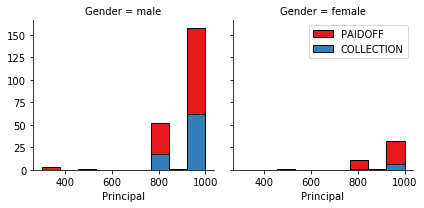

In [46]:
bins = np.linspace(df['Principal'].min(),df['Principal'].max(),10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist,'Principal',bins=bins,ec='k')

g.axes[-1].legend()
plt.show()

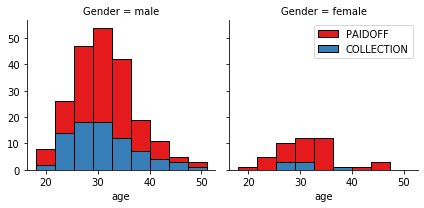

In [45]:
bins = np.linspace(df['age'].min(),df['age'].max(),10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec='k')

g.axes[-1].legend()
plt.show()